# Loading Modules:

In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score

In [2]:
os.getcwd()

'C:\\Users\\dured\\Downloads'

# Data Loading:

In [3]:
train_data=pd.read_csv('train_fNxu4vz.csv')
test_data=pd.read_csv('test_fjtUOL8.csv')
df=pd.concat([train_data,test_data], axis=0)
df.head(5)

C:\Users\dured\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Annual_Income,Debt_To_Income,Gender,Home_Owner,Income_Verified,Inquiries_Last_6Mo,Interest_Rate,Length_Employed,Loan_Amount_Requested,Loan_ID,Months_Since_Deliquency,Number_Open_Accounts,Purpose_Of_Loan,Total_Accounts
0,68000.0,18.37,Female,Rent,not verified,0,1.0,< 1 year,"7,000",10000001,NaN,9,car,14
1,NaN,14.93,Female,Mortgage,VERIFIED - income,0,3.0,4 years,"30,000",10000002,17.0,12,debt_consolidation,24
2,75566.4,15.88,Male,Mortgage,VERIFIED - income source,0,3.0,7 years,"24,725",10000003,NaN,12,debt_consolidation,16
3,56160.0,14.34,Male,NaN,VERIFIED - income source,3,3.0,< 1 year,"16,000",10000004,NaN,16,debt_consolidation,22
4,96000.0,22.17,Female,Own,VERIFIED - income source,1,1.0,8 years,"17,000",10000005,NaN,19,debt_consolidation,30


# Data Cleaning and Manipulation:

In [4]:
df.dtypes

Annual_Income              float64
Debt_To_Income             float64
Gender                      object
Home_Owner                  object
Income_Verified             object
Inquiries_Last_6Mo           int64
Interest_Rate              float64
Length_Employed             object
Loan_Amount_Requested       object
Loan_ID                      int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Purpose_Of_Loan             object
Total_Accounts               int64
dtype: object

In [5]:
len(df)

273850

In [6]:
df['Length_Employed'].value_counts()

10+ years    88328
2 years      24420
3 years      21478
< 1 year     21133
5 years      18042
1 year       17336
4 years      16393
7 years      15444
6 years      15351
8 years      13115
9 years      10503
Name: Length_Employed, dtype: int64

In [7]:
df['Length_Employed']=df['Length_Employed'].astype(str)
df.loc[df.Length_Employed=='10+ years','Length_Employed']='10'
df.loc[df.Length_Employed=='< 1 year','Length_Employed']='0.5'
list_len_empd_values=list(df['Length_Employed'].value_counts().index)
list_len_empd_values.remove('10')
list_len_empd_values.remove('0.5')
list_len_empd_values_records_df=list(df[df['Length_Employed'].isin(list_len_empd_values)]['Length_Employed'])
values_len_empd_df=[]
for i in range(0,len(list_len_empd_values_records_df)):    
    values_len_empd_df.append(list_len_empd_values_records_df[i].split()[0])
df.loc[df['Length_Employed'].isin(list_len_empd_values),'Length_Employed']=values_len_empd_df
df['Length_Employed']=df['Length_Employed'].astype(float)

In [8]:
df['Length_Employed'].value_counts()

10.0    88328
2.0     24420
3.0     21478
0.5     21133
5.0     18042
1.0     17336
4.0     16393
7.0     15444
6.0     15351
8.0     13115
9.0     10503
Name: Length_Employed, dtype: int64

In [9]:
df.Loan_Amount_Requested=df.Loan_Amount_Requested.str.replace(',','')
df.Loan_Amount_Requested=df.Loan_Amount_Requested.astype(int)

In [10]:
df.head(5)

,Annual_Income,Debt_To_Income,Gender,Home_Owner,Income_Verified,Inquiries_Last_6Mo,Interest_Rate,Length_Employed,Loan_Amount_Requested,Loan_ID,Months_Since_Deliquency,Number_Open_Accounts,Purpose_Of_Loan,Total_Accounts
0,68000.0,18.37,Female,Rent,not verified,0,1.0,0.5,7000,10000001,NaN,9,car,14
1,NaN,14.93,Female,Mortgage,VERIFIED - income,0,3.0,4.0,30000,10000002,17.0,12,debt_consolidation,24
2,75566.4,15.88,Male,Mortgage,VERIFIED - income source,0,3.0,7.0,24725,10000003,NaN,12,debt_consolidation,16
3,56160.0,14.34,Male,NaN,VERIFIED - income source,3,3.0,0.5,16000,10000004,NaN,16,debt_consolidation,22
4,96000.0,22.17,Female,Own,VERIFIED - income source,1,1.0,8.0,17000,10000005,NaN,19,debt_consolidation,30


In [12]:
df['Gender']=df['Gender'].astype('category')
df['Home_Owner']=df['Home_Owner'].astype('category')
df['Loan_ID']=df['Loan_ID'].astype('category')
df['Purpose_Of_Loan']=df['Purpose_Of_Loan'].astype('category')
df['Income_Verified']=df['Income_Verified'].astype('category')

In [13]:
df.dtypes

Annual_Income               float64
Debt_To_Income              float64
Gender                     category
Home_Owner                 category
Income_Verified            category
Inquiries_Last_6Mo            int64
Interest_Rate               float64
Length_Employed             float64
Loan_Amount_Requested         int32
Loan_ID                    category
Months_Since_Deliquency     float64
Number_Open_Accounts          int64
Purpose_Of_Loan            category
Total_Accounts                int64
dtype: object

In [14]:
df.isna().sum()

Annual_Income               42000
Debt_To_Income                  0
Gender                          0
Home_Owner                  42060
Income_Verified                 0
Inquiries_Last_6Mo              0
Interest_Rate              109541
Length_Employed             12307
Loan_Amount_Requested           0
Loan_ID                         0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Purpose_Of_Loan                 0
Total_Accounts                  0
dtype: int64

                         Annual_Income  Debt_To_Income  Inquiries_Last_6Mo  \
Annual_Income                 1.000000       -0.180756            0.058453   
Debt_To_Income               -0.180756        1.000000           -0.005079   
Inquiries_Last_6Mo            0.058453       -0.005079            1.000000   
Interest_Rate                -0.052783        0.152472            0.188987   
Length_Employed               0.070335        0.048860           -0.007466   
Loan_Amount_Requested         0.349145        0.055914           -0.008096   
Months_Since_Deliquency      -0.055736        0.006626            0.011673   
Number_Open_Accounts          0.149062        0.303119            0.099949   
Total_Accounts                0.211464        0.228669            0.132369   

                         Interest_Rate  Length_Employed  \
Annual_Income                -0.052783         0.070335   
Debt_To_Income                0.152472         0.048860   
Inquiries_Last_6Mo            0.188987    

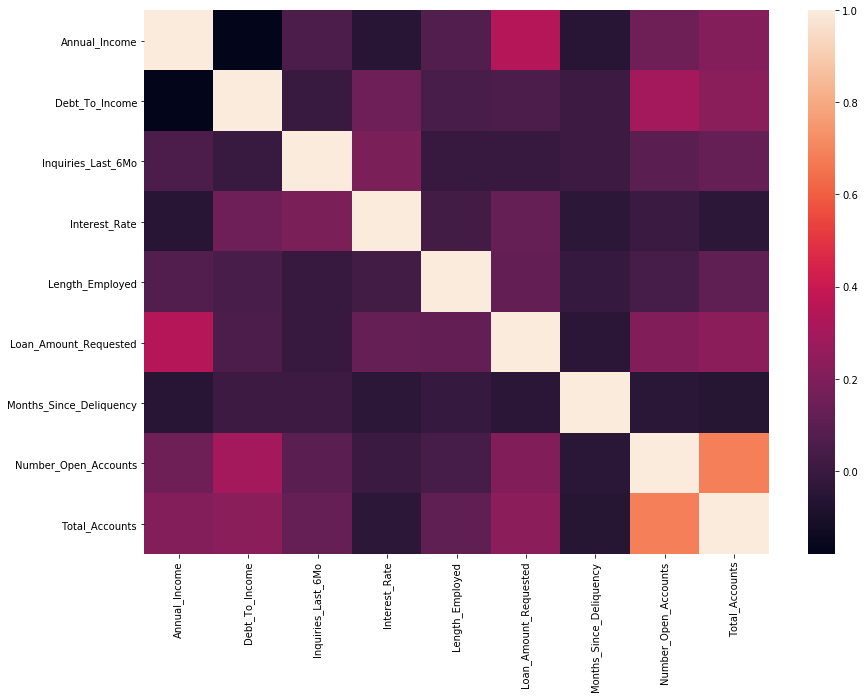

In [15]:
fig,axis=plt.subplots()
fig.set_size_inches(14, 10)
print(df.corr())
print('\n\n\n')
fig=sns.heatmap(df.corr())

In [16]:
df.head(5)

,Annual_Income,Debt_To_Income,Gender,Home_Owner,Income_Verified,Inquiries_Last_6Mo,Interest_Rate,Length_Employed,Loan_Amount_Requested,Loan_ID,Months_Since_Deliquency,Number_Open_Accounts,Purpose_Of_Loan,Total_Accounts
0,68000.0,18.37,Female,Rent,not verified,0,1.0,0.5,7000,10000001,NaN,9,car,14
1,NaN,14.93,Female,Mortgage,VERIFIED - income,0,3.0,4.0,30000,10000002,17.0,12,debt_consolidation,24
2,75566.4,15.88,Male,Mortgage,VERIFIED - income source,0,3.0,7.0,24725,10000003,NaN,12,debt_consolidation,16
3,56160.0,14.34,Male,NaN,VERIFIED - income source,3,3.0,0.5,16000,10000004,NaN,16,debt_consolidation,22
4,96000.0,22.17,Female,Own,VERIFIED - income source,1,1.0,8.0,17000,10000005,NaN,19,debt_consolidation,30


In [17]:
for each in ['Annual_Income','Length_Employed','Months_Since_Deliquency']:
    integer_or_float_value=df[each].mean()
    df.loc[df[each].isna(), each]=integer_or_float_value

df.isna().sum()

Annual_Income                   0
Debt_To_Income                  0
Gender                          0
Home_Owner                  42060
Income_Verified                 0
Inquiries_Last_6Mo              0
Interest_Rate              109541
Length_Employed                 0
Loan_Amount_Requested           0
Loan_ID                         0
Months_Since_Deliquency         0
Number_Open_Accounts            0
Purpose_Of_Loan                 0
Total_Accounts                  0
dtype: int64

In [18]:
df['Home_Owner']=df['Home_Owner'].astype(str)
df.loc[df['Home_Owner']=='nan','Home_Owner']='some category'

In [ ]:
brackets_for_Debt_to_income=[]
for each in df.Debt_To_Income:
    if(each>=0 and each<=11.36):
        brackets_for_Debt_to_income.append(1)
    elif(each>11.36 and each<=16.85):
        brackets_for_Debt_to_income.append(2)
    elif(each>16.85 and each<=22.78):
        brackets_for_Debt_to_income.append(3)
    else:
        brackets_for_Debt_to_income.append(4)
df.brackets_for_Debt_to_income=pd.Series(brackets_for_Debt_to_income)

In [20]:
df['Interest_Rate'].value_counts(dropna=False)

NaN     109541
 2.0     70580
 3.0     59923
 1.0     33806
Name: Interest_Rate, dtype: int64

# Labelling Categorical Data:

In [21]:
# performing label encoding over obtained features as stated below, for building a model:


lcols=['Gender', 'Home_Owner', 'Income_Verified', 'Purpose_Of_Loan']

enc_df=pd.DataFrame(columns=lcols, index=range(0,len(df)))
for each in lcols:
    le = LabelEncoder()
    enc_df[each] = pd.DataFrame(le.fit_transform(df[each]))

df_labelled=df

df_labelled=df_labelled.drop(['Gender', 'Home_Owner', 'Income_Verified', 'Purpose_Of_Loan','Loan_ID'], axis=1)

for each in lcols:
    df_labelled[each]=enc_df[each]
    
df_labelled

,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Interest_Rate,Length_Employed,Loan_Amount_Requested,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Home_Owner,Income_Verified,Purpose_Of_Loan
0,68000.000000,18.37,0,1.0,0.500000,7000,34.103395,9,14,0,4,2,0
1,73392.793977,14.93,0,3.0,4.000000,30000,17.000000,12,24,0,0,0,2
2,75566.400000,15.88,0,3.0,7.000000,24725,34.103395,12,16,1,0,1,2
3,56160.000000,14.34,3,3.0,0.500000,16000,34.103395,16,22,1,5,1,2
4,96000.000000,22.17,1,1.0,8.000000,17000,34.103395,19,30,0,3,1,2
5,30000.000000,10.88,1,3.0,2.000000,4500,34.103395,12,15,1,4,1,1
6,85000.000000,5.65,0,3.0,4.000000,18075,34.103395,9,12,1,4,0,2
7,115000.000000,7.97,1,2.0,0.500000,15000,16.000000,25,31,0,4,0,2
8,73392.793977,16.12,3,3.0,10.000000,6300,34.103395,8,9,0,4,2,2
9,163000.000000,11.13,0,1.0,10.000000,30000,34.103395,24,43,1,3,0,2


In [23]:
df_labelled.Interest_Rate.value_counts(dropna=False)

NaN     109541
 2.0     70580
 3.0     59923
 1.0     33806
Name: Interest_Rate, dtype: int64

# Model Building:

In [24]:
# defining function to output results of grid search technique in a precise manner:
def print_results(x):
    v=len(x['mean_fit_time']);
    for i in range(0,v):
        print('Model with hyperparameter combination - {0}, mean_test score is {1}, std_test_score is {2}, rank_test_score is {3} and mean_fit_time is {4}'.format(x['params'][i], x['mean_test_score'][i], x['std_test_score'][i], x['rank_test_score'][i], x['mean_fit_time'][i]));    

In [29]:
df_train=df_labelled[0:len(train_data)]
df_trainx=df_train.drop(['Interest_Rate'], axis=1)
df_trainy=df_train['Interest_Rate']
xtrain, xval, ytrain, yval=train_test_split(df_trainx, df_trainy, test_size=0.2, random_state=20, stratify=df_trainy)

rfmodel=RandomForestClassifier();
param_list = {"max_depth": [5, 10, 25], "max_leaf_nodes": [10,25,50], 'n_estimators' : [10,25]};
gridcv = GridSearchCV(estimator=rfmodel, param_grid=param_list, cv=5)
gridcv.fit(xtrain, ytrain.values.ravel());

x=gridcv.cv_results_
print_results(x);

Model with hyperparameter combination - {'max_depth': 5, 'max_leaf_nodes': 10, 'n_estimators': 10}, mean_test score is 0.4934612429344146, std_test_score is 0.0012906031750157928, rank_test_score is 15 and mean_fit_time is 0.9474851608276367
Model with hyperparameter combination - {'max_depth': 5, 'max_leaf_nodes': 10, 'n_estimators': 25}, mean_test score is 0.4938948777834412, std_test_score is 0.0015614403365040146, rank_test_score is 14 and mean_fit_time is 2.194245195388794
Model with hyperparameter combination - {'max_depth': 5, 'max_leaf_nodes': 25, 'n_estimators': 10}, mean_test score is 0.4996234223679506, std_test_score is 0.001985156908517072, rank_test_score is 12 and mean_fit_time is 1.0790428161621093
Model with hyperparameter combination - {'max_depth': 5, 'max_leaf_nodes': 25, 'n_estimators': 25}, mean_test score is 0.5031533621916058, std_test_score is 0.0013336318166753903, rank_test_score is 7 and mean_fit_time is 2.654949760437012
Model with hyperparameter combinatio

In [32]:
xtrain=xtrain.astype('int')
xgbmodel=xgb.XGBClassifier()
param_list = {"max_depth": [10,25], "learning_rate": [0.01,0.1], 'n_estimators' : [10,25]};
xgbgridcv = GridSearchCV(estimator=xgbmodel, param_grid=param_list, cv=5)
xgbgridcv.fit(xtrain, ytrain.values.ravel());

k=xgbgridcv.cv_results_
print_results(k);

KeyboardInterrupt: 

In [35]:
rfestimator=gridcv.best_estimator_
rf_yval=rfestimator.predict(xval)

rf_score=accuracy_score(yval,rf_yval)
print('Accuracy from Random Forest Classifier')
print(rf_score)

Accuracy from Random Forest Classifier
0.5113200657294139


In [38]:
print('Random Forest Classifier Confusion Matrix')
print(confusion_matrix(yval,rf_yval))

Random Forest Classifier Confusion Matrix
[[  376  5333  1052]
 [  179 10167  3770]
 [   36  5689  6260]]


In [43]:
# Considering Preprocessed Test Data for predicting the gender for the session views:

df_labelled.reset_index(drop=True, inplace=True)
df_test=df_labelled.loc[len(train_data):len(df_labelled),:]
df_testt=df_test.drop(['Interest_Rate'], axis=1)
df_testt=df_testt.astype('int')

y_test_enc=rfestimator.predict(df_testt)

# Capturing predicted output into DataFrame and saving DataFrame in '.csv' format file 

output_data=test_data[['Loan_ID']]
output_data['Interest_Rate']=pd.Series(y_test_enc)
output_data

C:\Users\dured\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,Loan_ID,Interest_Rate
0,10164310,1.0
1,10164311,2.0
2,10164312,3.0
3,10164313,2.0
4,10164314,3.0
5,10164315,2.0
6,10164316,3.0
7,10164317,3.0
8,10164318,2.0
9,10164319,3.0


In [44]:
output_data.to_csv('Janata_banking_Prediction.csv', index=False)